In [130]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.metrics import r2_score

### Importing all the necessary Libraries for the assignment

In [131]:
import warnings
warnings.filterwarnings('ignore')

### Data Reading & Cleaning

In [132]:
bk = pd.read_csv(r"C:\Users\Sundar\day.csv")

In [133]:
bk.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [134]:
bk.shape

(730, 16)

In [135]:
bk.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [136]:
bk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [137]:
bk.isnull().count()

instant       730
dteday        730
season        730
yr            730
mnth          730
holiday       730
weekday       730
workingday    730
weathersit    730
temp          730
atemp         730
hum           730
windspeed     730
casual        730
registered    730
cnt           730
dtype: int64

In [138]:
bk.rename(columns={'yr':'year','mnth':'month','hum':'humidity'}, inplace=True)

In [139]:
bk.drop(['instant','dteday','casual','registered'],axis=1,inplace=True)

In [140]:
bk.season = bk.season.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})
bk.month = bk.month.map({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'june',7:'july',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'})
bk.weekday = bk.weekday.map({0:'sun',1:'mon',2:'tue',3:'wed',4:'thu',5:'fri',6:'sat'})
bk.weathersit = bk.weathersit.map({1:'Clear',2:'Misty',3:'Light_snowrain',4:'Heavy_snowrain'})

In [141]:
bk.head(15)

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,cnt
0,spring,0,jan,0,sat,0,Misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,Misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600
5,spring,0,jan,0,thu,1,Clear,8.378268,11.66045,51.8261,6.000868,1606
6,spring,0,jan,0,fri,1,Misty,8.057402,10.44195,49.8696,11.304642,1510
7,spring,0,jan,0,sat,0,Misty,6.765000,8.11270,53.5833,17.875868,959
8,spring,0,jan,0,sun,0,Clear,5.671653,5.80875,43.4167,24.250650,822
9,spring,0,jan,0,mon,1,Clear,6.184153,7.54440,48.2917,14.958889,1321


### Data Visualization using box plot for category variable, scatter plot for numeric variable

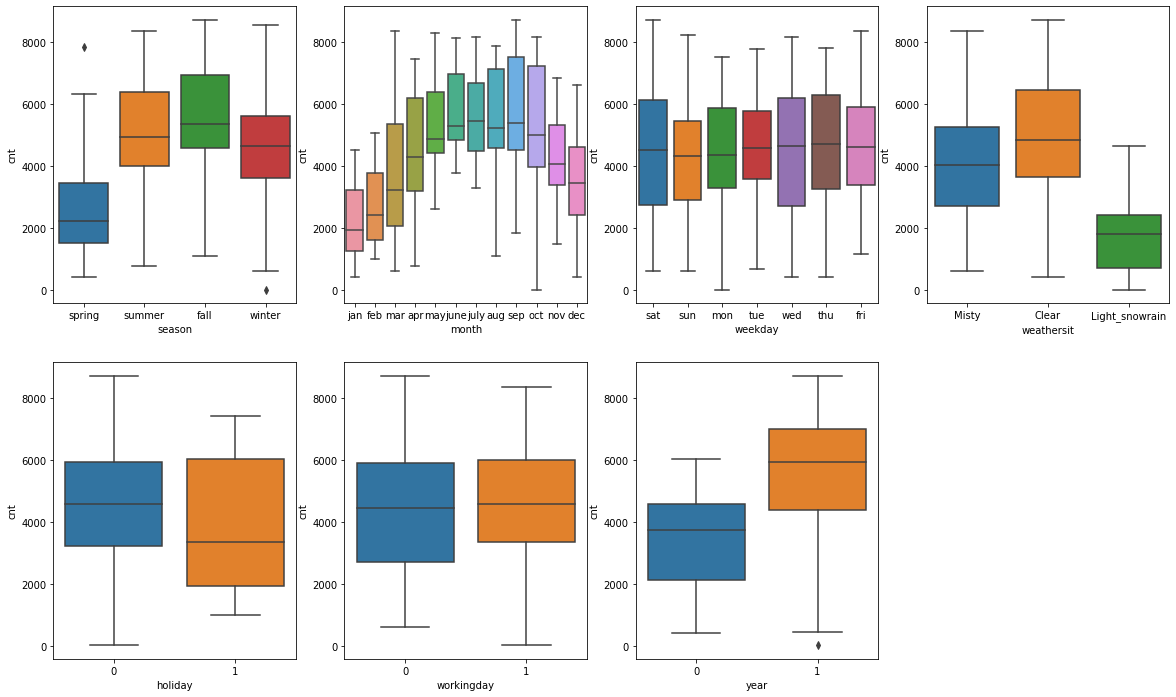

In [142]:
plt.figure(figsize=(20, 12))
plt.subplot(2,4,1)
sns.boxplot(x = 'season', y = 'cnt', data = bk)
plt.subplot(2,4,2)
sns.boxplot(x = 'month', y = 'cnt', data = bk)
plt.subplot(2,4,3)
sns.boxplot(x = 'weekday', y = 'cnt', data = bk)
plt.subplot(2,4,4)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bk)
plt.subplot(2,4,5)
sns.boxplot(x = 'holiday', y = 'cnt', data = bk)
plt.subplot(2,4,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = bk)
plt.subplot(2,4,7)
sns.boxplot(x = 'year', y = 'cnt', data = bk)
plt.show()

### Observations from EDA

#### 
1. Fall has more booking compared to other seasons
2. There is no relationship w.r.t weekdays
3. Duirng snowrain less bookings are seen
4. Working day and holiday doesn't affect bookings
5. 2019 seen increase in booking

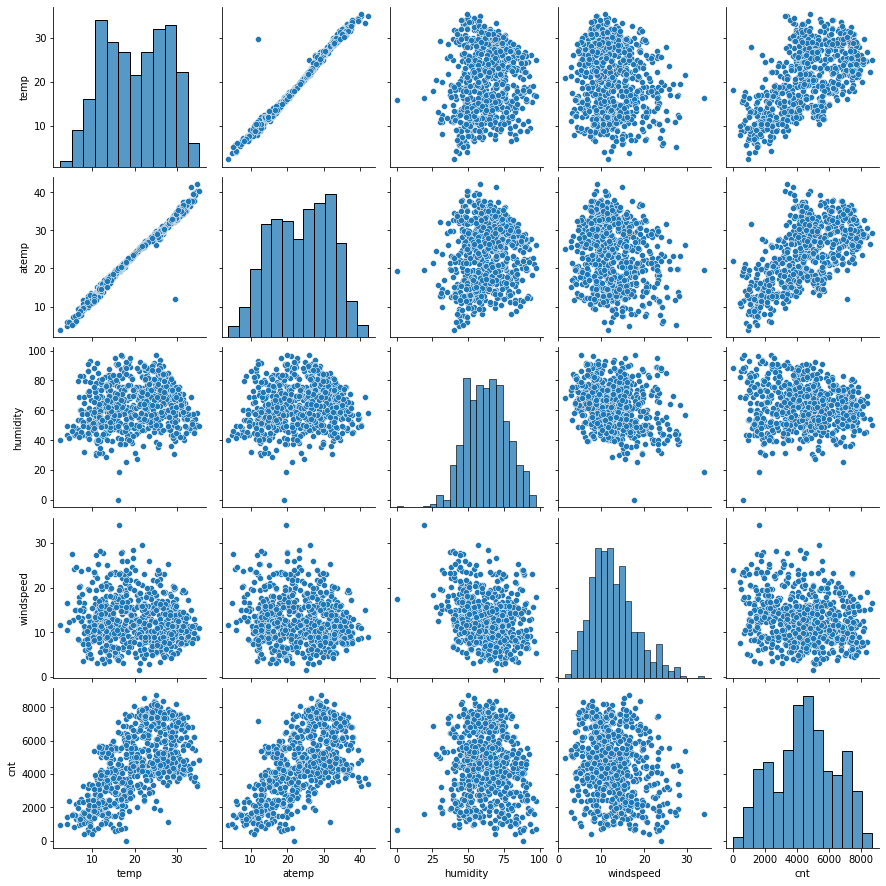

In [143]:
sns.pairplot(data=bk,vars=['temp','atemp','humidity','windspeed','cnt'])
plt.show()

### - atemp and temp variable showing good correlation

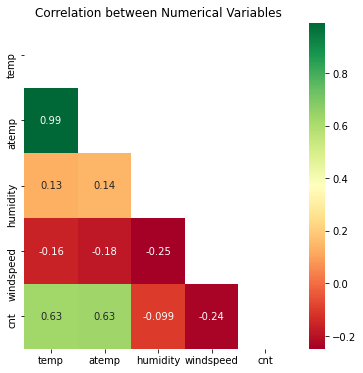

In [144]:
plt.figure(figsize = (6,6))
matrix = np.triu(bk[['temp','atemp','humidity','windspeed','cnt']].corr())
sns.heatmap(bk[['temp','atemp','humidity','windspeed','cnt']].corr(), annot = True, cmap="RdYlGn", mask=matrix)
plt.title("Correlation between Numerical Variables")
plt.show()

In [145]:
months_bk=pd.get_dummies(bk.month,drop_first=True)
weekdays_bk=pd.get_dummies(bk.weekday,drop_first=True)
weathersit_bk=pd.get_dummies(bk.weathersit,drop_first=True)
seasons_bk=pd.get_dummies(bk.season,drop_first=True)

### Dummy variables are created for categorical variable

In [146]:
bk_new = pd.concat([bk,months_bk,weekdays_bk,weathersit_bk,seasons_bk],axis=1)

In [147]:
bk_new.drop(['season','month','weekday','weathersit'], axis = 1, inplace = True)

In [148]:
np.random.seed(0)
bk_train, bk_test = train_test_split(bk_new, train_size = 0.7, random_state = 100)

### Data is split into 70-30 Split for training and testing 

In [149]:
scaler = MinMaxScaler()

In [150]:
num_vars = ['temp','atemp','humidity','windspeed','cnt']
bk_train[num_vars] = scaler.fit_transform(bk_train[num_vars])

#### Only the necessary variables scaling is performed

In [151]:
bk_train.describe()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537440,0.513156,0.650480,0.320883,0.513499
std,0.500429,0.157763,0.468282,0.225858,0.212410,0.145846,0.169803,0.224421
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420
50%,1.000000,0.000000,1.000000,0.542596,0.529718,0.653714,0.296763,0.518638
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


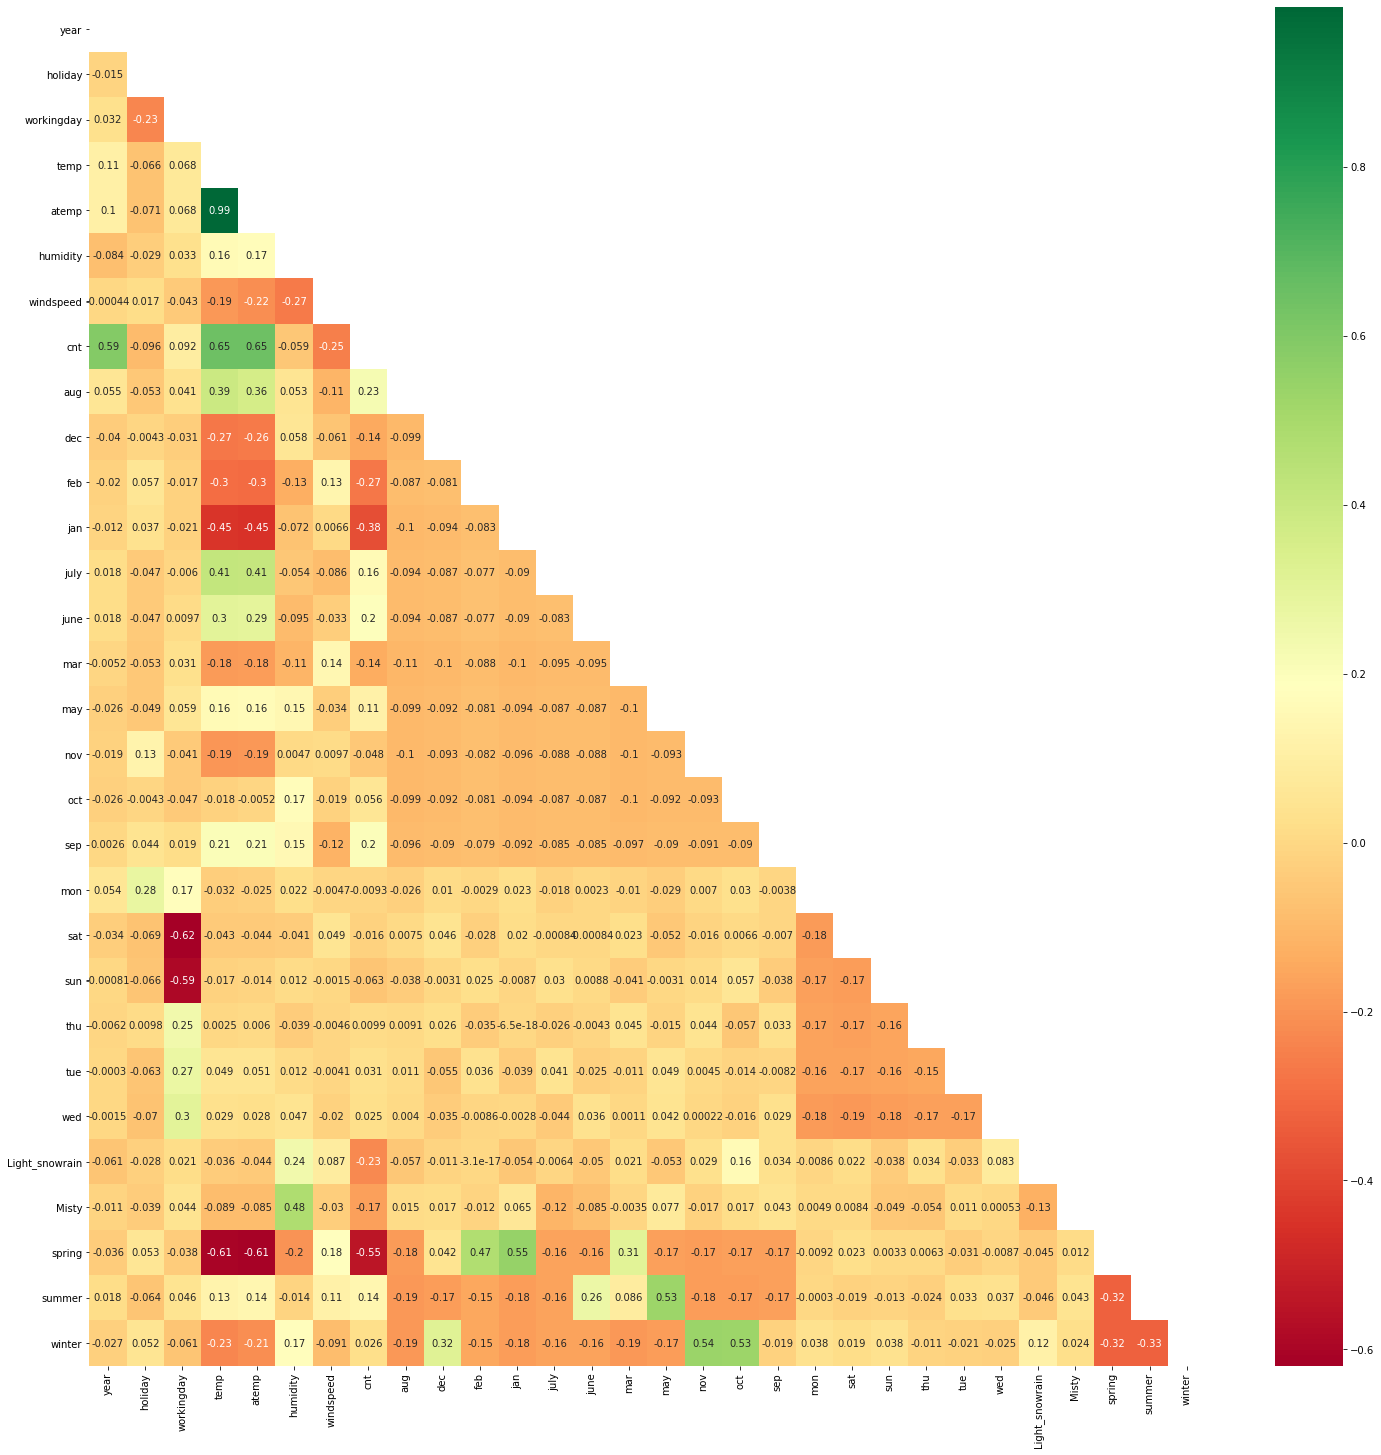

In [152]:
plt.figure(figsize = (25,25))
matrix = np.triu(bk_train.corr())
sns.heatmap(bk_train.corr(), annot = True, cmap="RdYlGn", mask=matrix)
plt.show()

### Target variable is 'cnt'. It has positive correaltion with year and temp. negative correlation with Spring

In [153]:
y_train = bk_train.pop('cnt')
X_train = bk_train

### Setting the target variable and indepent variables

In [154]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [155]:
rfe = RFE(lm,n_features_to_select=10)

In [156]:
rfe = rfe.fit(X_train, y_train)

### Modelling the Linear Regression

In [157]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('year', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 12),
 ('humidity', True, 1),
 ('windspeed', True, 1),
 ('aug', False, 13),
 ('dec', False, 9),
 ('feb', False, 10),
 ('jan', False, 7),
 ('july', False, 2),
 ('june', False, 18),
 ('mar', False, 20),
 ('may', False, 11),
 ('nov', False, 8),
 ('oct', False, 17),
 ('sep', False, 4),
 ('mon', False, 14),
 ('sat', True, 1),
 ('sun', True, 1),
 ('thu', False, 16),
 ('tue', False, 15),
 ('wed', False, 19),
 ('Light_snowrain', True, 1),
 ('Misty', False, 3),
 ('spring', True, 1),
 ('summer', False, 6),
 ('winter', False, 5)]

### RFE is used to filter out the less important variables
### 10 variables are selected using RFE

In [158]:
col = X_train.columns[rfe.support_]
print(col)

Index(['year', 'holiday', 'workingday', 'temp', 'humidity', 'windspeed', 'sat',
       'sun', 'Light_snowrain', 'spring'],
      dtype='object')


In [159]:
def calculateVIF(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif 

### Using VIF , highly correlated variables are removed with independent set

In [160]:
X_train_rfe = X_train[col]
X_train_rfe = X_train_rfe.astype(float)
calculateVIF(X_train_rfe)

,Features,VIF
2,workingday,32.66
6,sat,8.05
7,sun,7.70
1,holiday,2.14
3,temp,1.63
9,spring,1.62
4,humidity,1.21
5,windspeed,1.13
8,Light_snowrain,1.10
0,year,1.03


In [161]:
X_train_lm_1 = sm.add_constant(X_train_rfe)
lr_1 = sm.OLS(y_train,X_train_lm_1).fit()
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.808
Method:                 Least Squares   F-statistic:                     239.2
Date:                Tue, 29 Oct 2024   Prob (F-statistic):          7.11e-175
Time:                        13:45:42   Log-Likelihood:                 464.41
No. Observations:                 510   AIC:                            -908.8
Df Residuals:                     500   BIC:                            -866.5
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.3293      0.024     13.

In [162]:
X_train_new = X_train_rfe.drop(['workingday'], axis = 1)
calculateVIF(X_train_new)

,Features,VIF
3,humidity,9.94
2,temp,8.40
4,windspeed,3.91
0,year,2.03
8,spring,1.79
5,sat,1.22
6,sun,1.21
7,Light_snowrain,1.11
1,holiday,1.04


In [163]:
X_train_new1 = X_train_new.drop(['humidity'], axis = 1)
calculateVIF(X_train_new1)

,Features,VIF
3,windspeed,3.71
2,temp,3.50
0,year,2.02
7,spring,1.51
4,sat,1.21
5,sun,1.19
6,Light_snowrain,1.05
1,holiday,1.04


### With Workingday and Humidty dropped, all variables less than 5 now

In [164]:
X_train_lm_2 = sm.add_constant(X_train_new1)
lr_2 = sm.OLS(y_train,X_train_lm_2).fit()
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.795
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     243.5
Date:                Tue, 29 Oct 2024   Prob (F-statistic):          3.22e-167
Time:                        13:45:43   Log-Likelihood:                 443.52
No. Observations:                 510   AIC:                            -869.0
Df Residuals:                     501   BIC:                            -830.9
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2844      0.020     14.

### With the 8 independent variables Linear Regression model is built

In [165]:
lr_2.params

const             0.284446
year              0.236749
holiday          -0.076115
temp              0.383109
windspeed        -0.150296
sat               0.012175
sun              -0.040055
Light_snowrain   -0.248947
spring           -0.146990
dtype: float64

In [166]:
X_train_lm_2

,const,year,holiday,temp,windspeed,sat,sun,Light_snowrain,spring
576,1.0,1.0,0.0,0.815169,0.264686,0.0,0.0,0.0,0.0
426,1.0,1.0,0.0,0.442393,0.255342,1.0,0.0,0.0,1.0
728,1.0,1.0,0.0,0.245101,0.663106,0.0,1.0,0.0,1.0
482,1.0,1.0,0.0,0.395666,0.188475,1.0,0.0,0.0,0.0
111,1.0,0.0,0.0,0.345824,0.380981,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
578,1.0,1.0,0.0,0.863973,0.187140,0.0,0.0,0.0,0.0
53,1.0,0.0,0.0,0.202618,0.111379,0.0,0.0,0.0,1.0
350,1.0,0.0,0.0,0.248216,0.431816,1.0,0.0,0.0,0.0
79,1.0,0.0,0.0,0.462664,0.529881,0.0,0.0,0.0,0.0


In [167]:
y_train_pred = lr_2.predict(X_train_lm_2)

 ### y train is predicted with the created LR model

Text(0.5, 0, 'Errors')

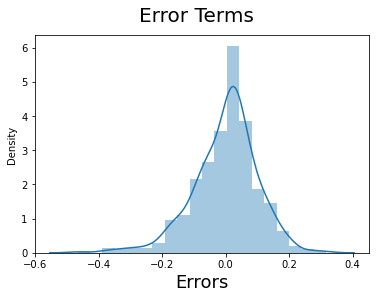

In [168]:
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20) 
plt.xlabel('Errors', fontsize = 18)

## Residual Plot

### The errors are normally distributed

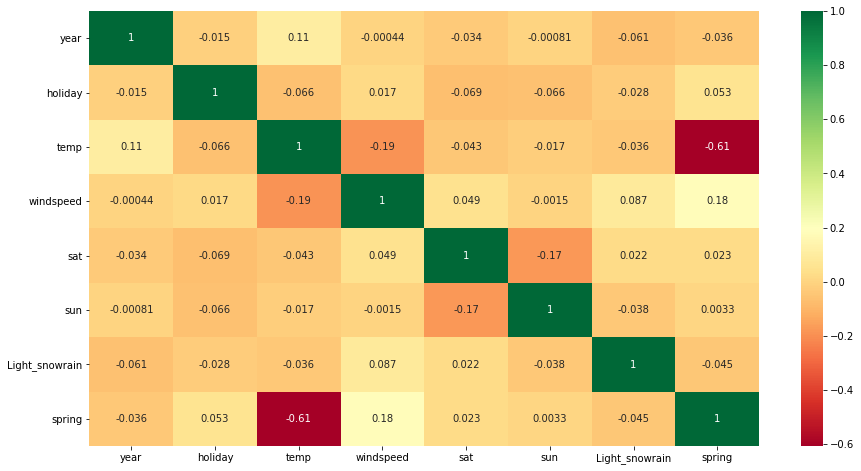

In [169]:
plt.figure(figsize=(15,8))
sns.heatmap(X_train_new1.corr(),annot = True, cmap="RdYlGn")
plt.show()

### All varaibles are mutually independent

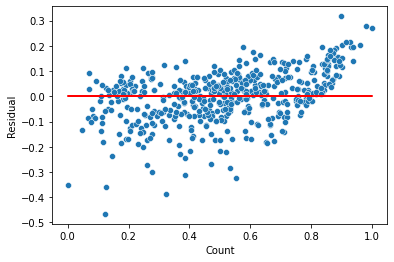

In [170]:
y_train_pred = lr_2.predict(X_train_lm_2)
residual = y_train - y_train_pred
sns.scatterplot(y_train,residual)
plt.plot(y_train,(y_train - y_train), '-r')
plt.xlabel('Count')
plt.ylabel('Residual')
plt.show()

### No clear pattern is observed from residual plot. No varaible is missed during modelling

In [171]:
# Applying scaling on the test dataset
num_vars = ['temp', 'atemp', 'humidity', 'windspeed','cnt']
bk_test[num_vars] = scaler.transform(bk_test[num_vars])
bk_test.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,False,False,...,False,False,False,False,False,False,True,False,False,False
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,False,False,...,False,False,False,False,True,False,False,False,True,False
299,0,0,1,0.511964,0.496145,0.837699,0.334206,0.303382,False,False,...,False,False,True,False,False,False,True,False,False,True
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,True,False,...,False,False,False,False,True,False,False,False,False,False
152,0,0,1,0.817246,0.741471,0.314298,0.537414,0.569029,False,False,...,False,False,True,False,False,False,False,False,True,False


In [172]:
bk_test.describe()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.700000,0.558718,0.532847,0.638221,0.313293,0.522154
std,0.500809,0.187620,0.459303,0.233187,0.217401,0.148694,0.159584,0.219163
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205
25%,0.000000,0.000000,0.000000,0.355429,0.344870,0.529197,0.198843,0.378595
50%,0.000000,0.000000,1.000000,0.558172,0.544652,0.625590,0.300126,0.524678
75%,1.000000,0.000000,1.000000,0.755981,0.713308,0.743798,0.402718,0.677750
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300


In [173]:
y_test = bk_test.pop('cnt')
X_test = bk_test

## Valdiation of model

In [186]:
X_test_lm_3 = sm.add_constant(X_test)
lr_3 = sm.OLS(y_test,X_test_lm_3).fit()

In [188]:
y_pred = lr_3.predict(X_test_lm_3)

### New y values are predicted using x test set

In [189]:
r2 = r2_score(y_test, y_pred)
round(r2,2)

0.79

## R^2 value for the model is 0.79

Text(0, 0.5, 'y_pred')

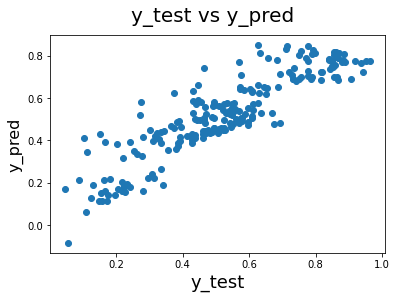

In [190]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20) 
plt.xlabel('y_test', fontsize = 18)
plt.ylabel('y_pred', fontsize = 16) 

## Most of the varaiablity is answered with the model

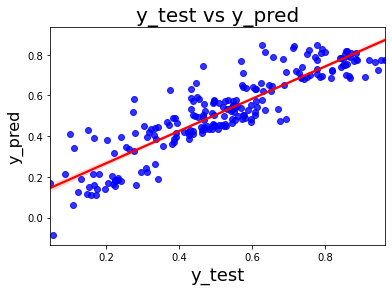

In [191]:

plt.figure()
sns.regplot(x=y_test, y=y_pred, ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title('y_test vs y_pred', fontsize=20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_pred', fontsize=16)
plt.show()

In [192]:
round(lr_3.params,2)

const             0.30
year              0.25
holiday          -0.08
temp              0.33
windspeed        -0.05
sat               0.01
sun              -0.03
Light_snowrain   -0.22
spring           -0.20
dtype: float64

## Results :

### Variables influencing bike booking: { year, holiday,temp,windspeed,sat,sun, Light_snowrain, spring}